# Topic 2: A model of production

This notebook uses the Penn World Table database to plot cross-country comparisons for capital and output per capita. The database with its latest <a href="https://www.rug.nl/ggdc/productivity/pwt/">PWT 10.01</a> version is hosted and updated by the University of Groningen.

In [1]:
# render graphs within notebook - may want to uncomment the next line for older versions of Jupyter
# %matplotlib inline

# import relevant packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


In [2]:
today = datetime.date.today().strftime('%d %B %Y')
print('Last update:',today)

Last update: 07 September 2025


# Penn World Tables cross-country comparison

In [3]:
# load PWT 10.0
# data_PWT = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')
# load PWT 10.01
data_PWT = pd.read_excel('https://dataverse.nl/api/access/datafile/354095',sheet_name='Data')

## Output per worker and capital per worker.

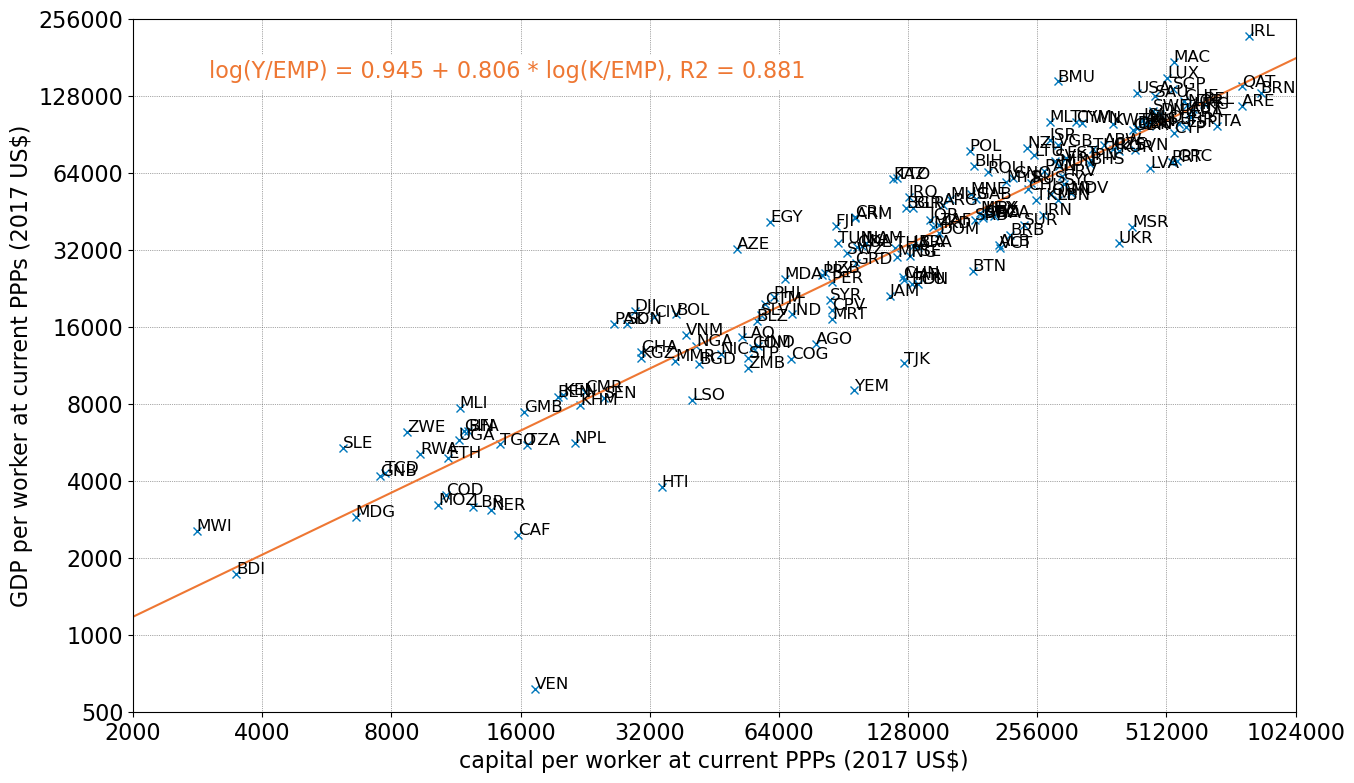

In [4]:
# choose year for which to plot the data
year = 2019

# capital and output per capita and per worker
k_pop = (data_PWT['cn'][data_PWT.year==year] / data_PWT['pop'][data_PWT.year==year]).to_numpy()
y_pop = (data_PWT['cgdpe'][data_PWT.year==year] / data_PWT['pop'][data_PWT.year==year]).to_numpy()
k_emp = (data_PWT['cn'][data_PWT.year==year] / data_PWT['emp'][data_PWT.year==year]).to_numpy()
y_emp = (data_PWT['cgdpe'][data_PWT.year==year] / data_PWT['emp'][data_PWT.year==year]).to_numpy()
labsh = (data_PWT['labsh'][data_PWT.year==year]).to_numpy()
tfp = (data_PWT['ctfp'][data_PWT.year==year]).to_numpy()
country_codes = (data_PWT['countrycode'][data_PWT.year==year]).to_numpy()

# choose measures
k_data = k_emp
y_data = y_emp

ind = np.invert(np.isnan(k_data)) & np.invert(np.isnan(y_data))

k_data = k_data[ind]
y_data = y_data[ind]
country_codes_data = country_codes[ind]

# linear regression on output on capital
X = np.log(k_data)
y = np.log(y_data)
linpred = stats.linregress(X,y)

xlim_min,xlim_max,ylim_min,ylim_max = 2000,1024000,500,256000
ypred_min = linpred.intercept+linpred.slope*np.log(xlim_min)
ypred_max = linpred.intercept+linpred.slope*np.log(xlim_max)

# plot log-log scale graph
param = {'figsize' : [15,9], 'fontsize': 16}
plt.rcParams['figure.figsize'] = param['figsize']  # Set default figure size
plt.rcParams['font.size'] = param['fontsize']      # Set default font size
fig,ax = plt.subplots()

ax.plot(k_data,y_data,linewidth=0,marker='x',color=ec.tolColor['tolVibrantBlue'],label='Real GDP')

plt.rcParams['font.size'] = 12
for i,txt in enumerate(country_codes_data):
    ax.annotate(txt,(k_data[i],y_data[i]))

ax.grid(which='both',color = ec.tolColor['tolDarkGrey'], linestyle = ':', linewidth = 0.5)

ax.set_xlabel('capital per worker at current PPPs (2017 US$)')
ax.set_ylabel('GDP per worker at current PPPs (2017 US$)')

# format axes
ax.set_xscale('log')
ax.set_yscale('log')

ax.minorticks_off()   
ax.set_xticks(1000*2**np.linspace(0,10,11))
ax.set_yticks(500*2**np.linspace(0,9,10))
ax.set_xlim([xlim_min,xlim_max])
ax.set_ylim([ylim_min,ylim_max])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))

# plot the regression line
ax.plot([xlim_min,xlim_max],np.exp([ypred_min,ypred_max]),color=ec.tolColor['tolVibrantOrange']);
plt.rcParams['font.size'] = 16
ax.text(3000,150000,f'log(Y/EMP) = {linpred.intercept:1.3f} + {linpred.slope:1.3f} * log(K/EMP), R2 = {linpred.rvalue**2:1.3f}',
        color=ec.tolColor['tolVibrantOrange'],backgroundcolor='w');

## Output per capita and capital per capita.

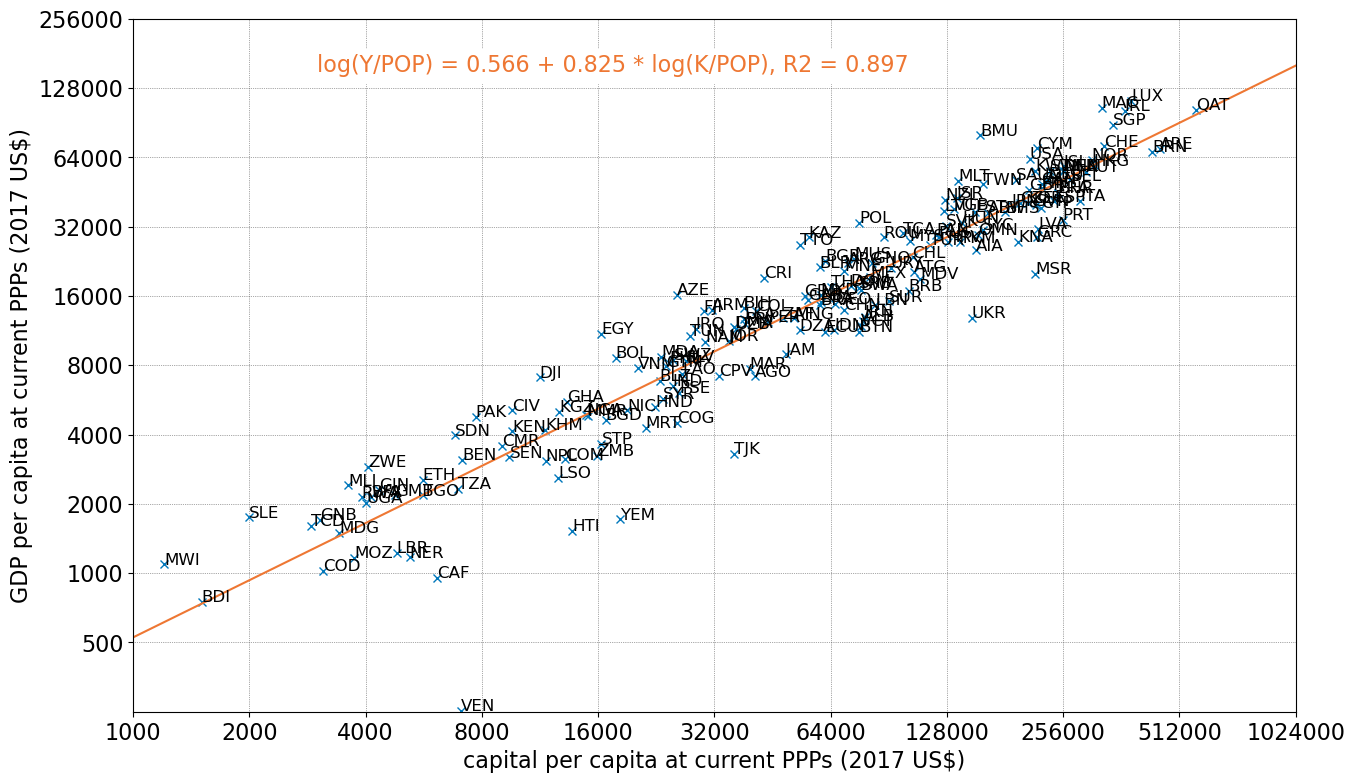

In [5]:
# choose measures
k_data = k_pop
y_data = y_pop

ind = np.invert(np.isnan(k_data)) & np.invert(np.isnan(y_data))

k_data = k_data[ind]
y_data = y_data[ind]
country_codes_data = country_codes[ind]

# linear regression on output on capital
X = np.log(k_data)
y = np.log(y_data)
linpred = stats.linregress(X,y)

xlim_min,xlim_max,ylim_min,ylim_max = 1000,1024000,250,256000
ypred_min = linpred.intercept+linpred.slope*np.log(xlim_min)
ypred_max = linpred.intercept+linpred.slope*np.log(xlim_max)

# plot log-log scale graph
param = {'figsize' : [15,9], 'fontsize': 16}
plt.rcParams['figure.figsize'] = param['figsize']  # Set default figure size
plt.rcParams['font.size'] = param['fontsize']      # Set default font size
fig,ax = plt.subplots()

ax.plot(k_data,y_data,linewidth=0,marker='x',color=ec.tolColor['tolVibrantBlue'],label='Real GDP')

plt.rcParams['font.size'] = 12
for i,txt in enumerate(country_codes_data):
    ax.annotate(txt,(k_data[i],y_data[i]))

ax.grid(which='both',color = ec.tolColor['tolDarkGrey'], linestyle = ':', linewidth = 0.5)

ax.set_xlabel('capital per capita at current PPPs (2017 US$)')
ax.set_ylabel('GDP per capita at current PPPs (2017 US$)')

# format axes
ax.set_xscale('log')
ax.set_yscale('log')

ax.minorticks_off()   
ax.set_xticks(1000*2**np.linspace(0,10,11))
ax.set_yticks(500*2**np.linspace(0,9,10))
ax.set_xlim([xlim_min,xlim_max])
ax.set_ylim([ylim_min,ylim_max])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))

# plot the regression line
ax.plot([xlim_min,xlim_max],np.exp([ypred_min,ypred_max]),color=ec.tolColor['tolVibrantOrange']);
plt.rcParams['font.size'] = 16
ax.text(3000,150000,f'log(Y/POP) = {linpred.intercept:1.3f} + {linpred.slope:1.3f} * log(K/POP), R2 = {linpred.rvalue**2:1.3f}',
        color=ec.tolColor['tolVibrantOrange'],backgroundcolor='w');

## Output per capita and labor share

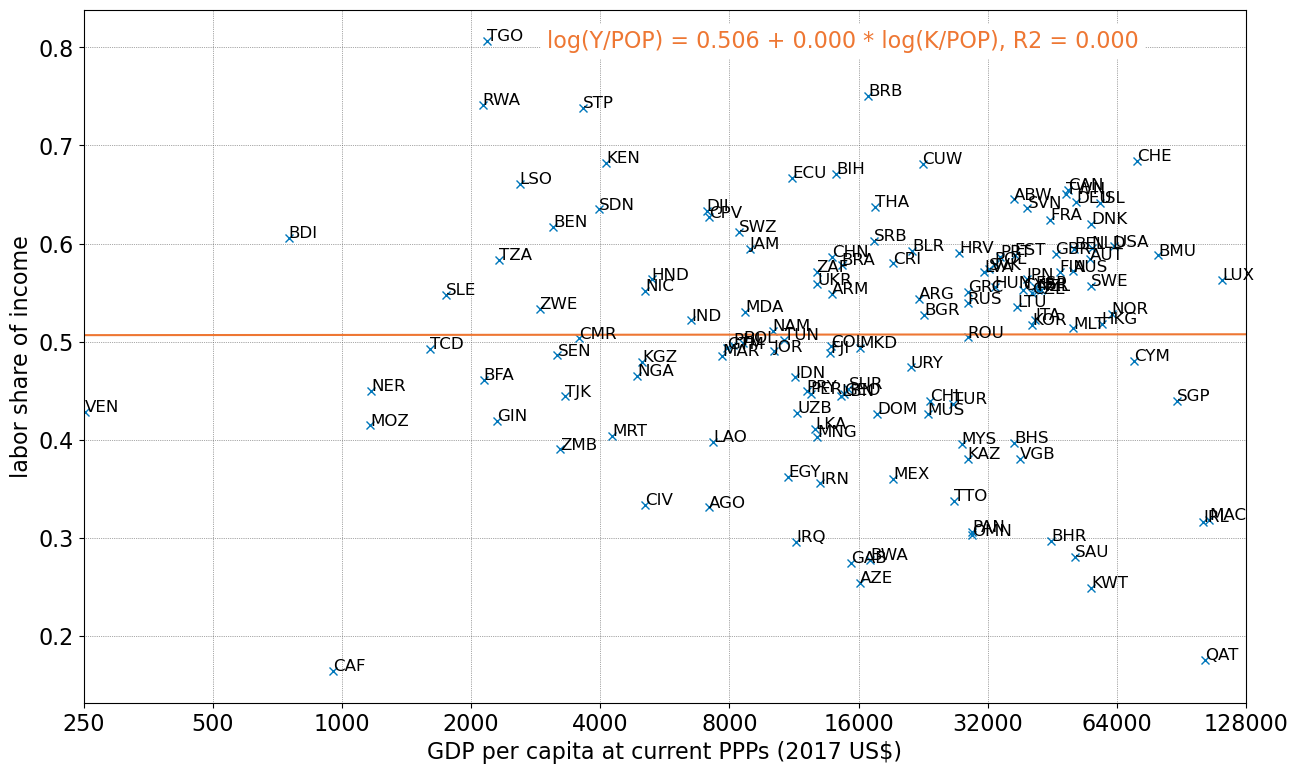

In [6]:
# choose measures
y_data = y_pop
labsh_data = labsh

ind = np.invert(np.isnan(y_data)) & np.invert(np.isnan(labsh_data))

y_data = y_data[ind]
labsh_data = labsh_data[ind]
country_codes_data = country_codes[ind]

# linear regression on output on capital
X = np.log(y_data)
y = labsh_data
linpred = stats.linregress(X,y)

xlim_min,xlim_max,ylim_min,ylim_max = 250,128000,0.4,0.8
ypred_min = linpred.intercept+linpred.slope*np.log(xlim_min)
ypred_max = linpred.intercept+linpred.slope*np.log(xlim_max)

# plot log-log scale graph
param = {'figsize' : [15,9], 'fontsize': 16}
plt.rcParams['figure.figsize'] = param['figsize']  # Set default figure size
plt.rcParams['font.size'] = param['fontsize']      # Set default font size
fig,ax = plt.subplots()

ax.plot(y_data,labsh_data,linewidth=0,marker='x',color=ec.tolColor['tolVibrantBlue'],label='Real GDP')

plt.rcParams['font.size'] = 12
for i,txt in enumerate(country_codes_data):
    ax.annotate(txt,(y_data[i],labsh_data[i]))

ax.grid(which='both',color = ec.tolColor['tolDarkGrey'], linestyle = ':', linewidth = 0.5)

ax.set_xlabel('GDP per capita at current PPPs (2017 US$)')
ax.set_ylabel('labor share of income')

# format axes
ax.set_xscale('log')

ax.minorticks_off()   
ax.set_xticks(250*2**np.linspace(0,10,11))
#ax.set_yticks(500*2**np.linspace(0,9,10))
ax.set_xlim([xlim_min,xlim_max])
#ax.set_ylim([ylim_min,ylim_max])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
#    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))

# plot the regression line
ax.plot([xlim_min,xlim_max],[ypred_min,ypred_max],color=ec.tolColor['tolVibrantOrange']);
plt.rcParams['font.size'] = 16
ax.text(3000,0.8,f'log(Y/POP) = {linpred.intercept:1.3f} + {linpred.slope:1.3f} * log(K/POP), R2 = {linpred.rvalue**2:1.3f}',
        color=ec.tolColor['tolVibrantOrange'],backgroundcolor='w');

## GDP per capita and TFP

Notice that the total factor productivity reported in PWT 10.0 is the residual after accounting not only for tangible capital but also for human capital.

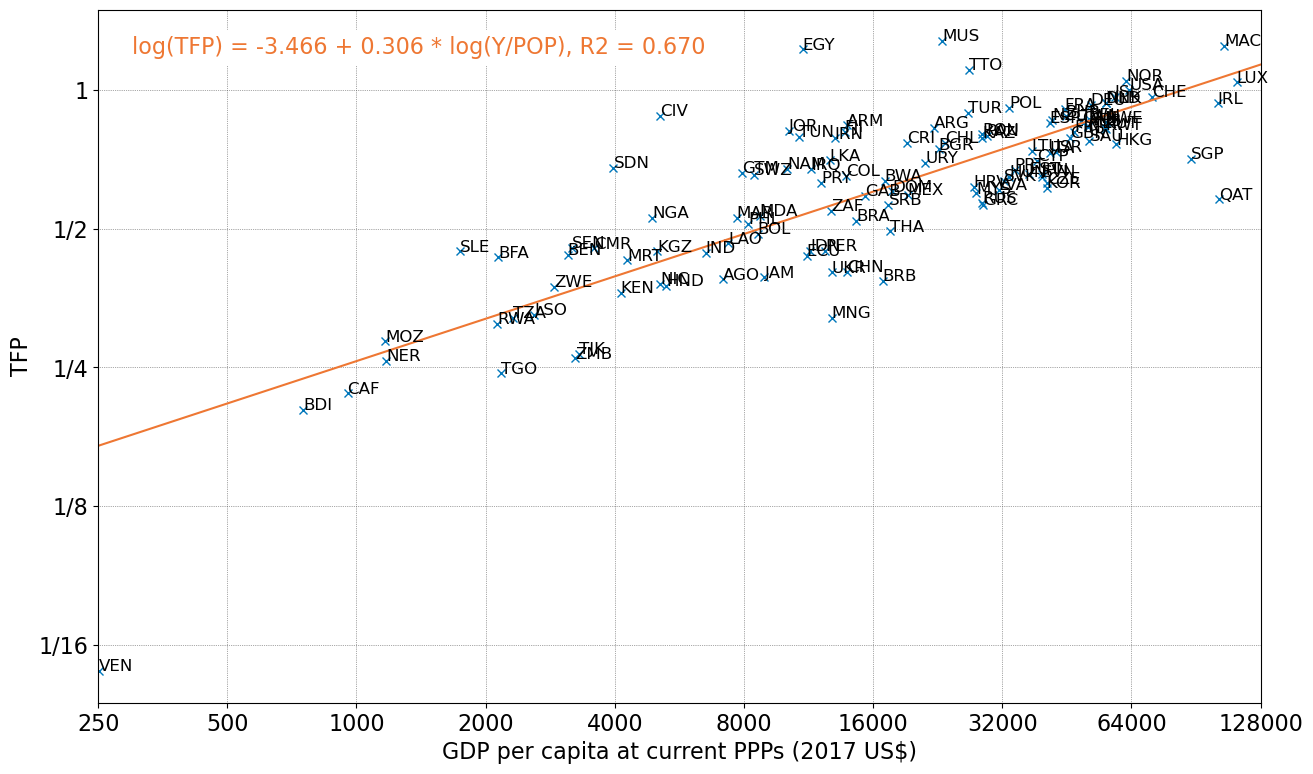

In [7]:
# choose measures
y_data = y_pop
tfp_data = tfp

ind = np.invert(np.isnan(y_data)) & np.invert(np.isnan(tfp_data))

y_data = y_data[ind]
tfp_data = tfp_data[ind]
country_codes_data = country_codes[ind]

# linear regression on output on capital
X = np.log(y_data)
y = np.log(tfp_data)
linpred = stats.linregress(X,y)

xlim_min,xlim_max,ylim_min,ylim_max = 250,128000,0.4,0.8
ypred_min = linpred.intercept+linpred.slope*np.log(xlim_min)
ypred_max = linpred.intercept+linpred.slope*np.log(xlim_max)

# plot log-log scale graph
param = {'figsize' : [15,9], 'fontsize': 16}
plt.rcParams['figure.figsize'] = param['figsize']  # Set default figure size
plt.rcParams['font.size'] = param['fontsize']      # Set default font size
fig,ax = plt.subplots()

ax.plot(y_data,tfp_data,linewidth=0,marker='x',color=ec.tolColor['tolVibrantBlue'],label='Real GDP')

plt.rcParams['font.size'] = 12
for i,txt in enumerate(country_codes_data):
    ax.annotate(txt,(y_data[i],tfp_data[i]))

ax.grid(which='both',color = ec.tolColor['tolDarkGrey'], linestyle = ':', linewidth = 0.5)

ax.set_xlabel('GDP per capita at current PPPs (2017 US$)')
ax.set_ylabel('TFP')

# format axes
ax.set_xscale('log')
ax.set_yscale('log')

ax.minorticks_off()   
ax.set_xticks(250*2**np.linspace(0,10,11))
ax.set_yticks(1/32*2**np.linspace(0,5,6))
ax.set_yticklabels(['1/32','1/16','1/8','1/4','1/2','1'])
ax.set_xlim([xlim_min,xlim_max])
#ax.set_ylim([ylim_min,ylim_max])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
#    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log2(y),0)))).format(y)))

# plot the regression line
ax.plot([xlim_min,xlim_max],np.exp([ypred_min,ypred_max]),color=ec.tolColor['tolVibrantOrange']);
plt.rcParams['font.size'] = 16
ax.text(300,1.2,f'log(TFP) = {linpred.intercept:1.3f} + {linpred.slope:1.3f} * log(Y/POP), R2 = {linpred.rvalue**2:1.3f}',
        color=ec.tolColor['tolVibrantOrange'],backgroundcolor='w');

# Macroeconomic aggregates for England

These data are based on Clark (2009) 'The Macroeconomic Aggregate for England, 1209-1869' (or 2009).
Tables 13 and 34 from the paper.
<a href="http://faculty.econ.ucdavis.edu/faculty/gclark/English%20Data/England%20NNI%20-%20Clark%20-%202015.xlsx">Spreadsheet</a> from Gregory Clark's <a href="http://faculty.econ.ucdavis.edu/faculty/gclark/data.html">webpage</a>.

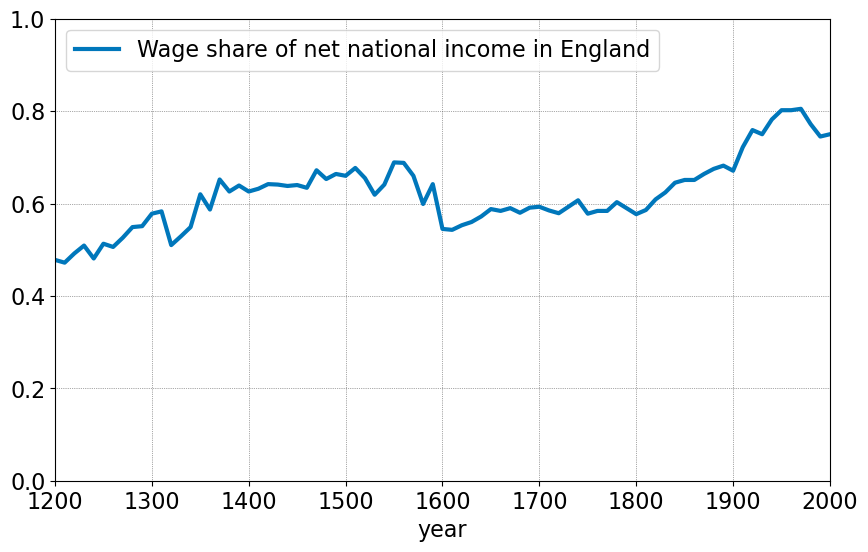

In [8]:
# real GDP
data_England = pd.read_excel('data/Clark-data-processed.xlsx',sheet_name='paper')
data_England = data_England.iloc[1:,:]
data_England = data_England.set_index('decade')

param = {'figsize' : [10,6], 'fontsize': 16,
         'title': '',
         'xlim': [1200,2000], 'ylim': [0,1],
         'xlabel': 'year', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data_England.index,data_England['Wage share'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Wage share of net national income in England')
x = ax.legend(loc='upper left')